Set up the Project by importing the essential libraries 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data csv file in pandas DataFrame

In [54]:
df =  pd.read_csv("Data-Collisions.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


How our data looklike

In [55]:
df.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


Check all the columns in the dataframe

In [56]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Check the shape the dataset

In [57]:
df.shape

(194673, 38)

Check how many values of which columns are empty. So we can estimate how many null values we have in data

In [58]:
missing_value =  df.isnull()
for column in missing_value.columns:
    print(missing_value[column].value_counts())
       

False    194673
Name: SEVERITYCODE, dtype: int64
False    189339
True       5334
Name: X, dtype: int64
False    189339
True       5334
Name: Y, dtype: int64
False    194673
Name: OBJECTID, dtype: int64
False    194673
Name: INCKEY, dtype: int64
False    194673
Name: COLDETKEY, dtype: int64
False    194673
Name: REPORTNO, dtype: int64
False    194673
Name: STATUS, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
True     129603
False     65070
Name: INTKEY, dtype: int64
False    191996
True       2677
Name: LOCATION, dtype: int64
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64
False    194673
Name: SEVERITYCODE.1, dtype: int64
False    194673
Name: SEVERITYDESC, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
False    194673
Name: PERSONCOUNT, dtype: int64
False    194673
Name: PEDCOUNT, dtype: int64
False    194673
Name: PEDCYLCOUNT, dtype: int64
F

Some EDA

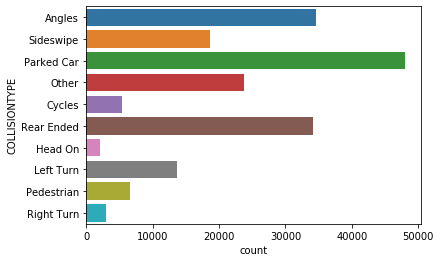

In [97]:
sns.countplot(y='COLLISIONTYPE', data = df)

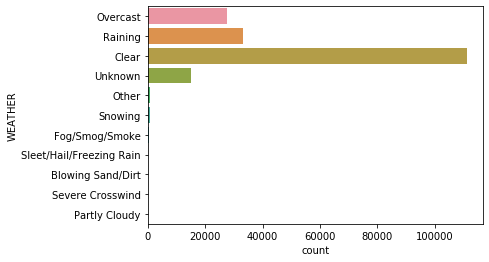

In [59]:
sns.countplot(y='WEATHER',data=df)

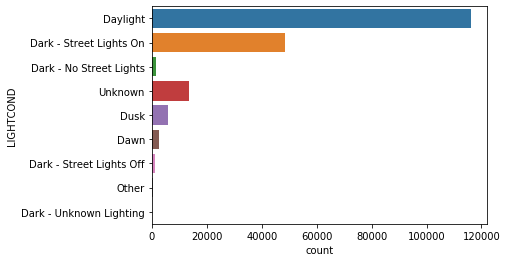

In [60]:
sns.countplot(y='LIGHTCOND', data = df)

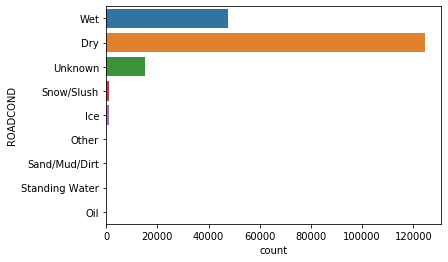

In [61]:
sns.countplot(y='ROADCOND', data=df)

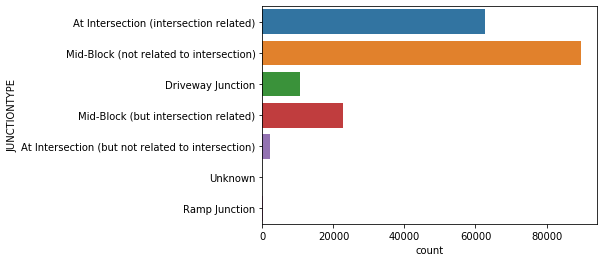

In [62]:
sns.countplot(y = 'JUNCTIONTYPE', data = df)

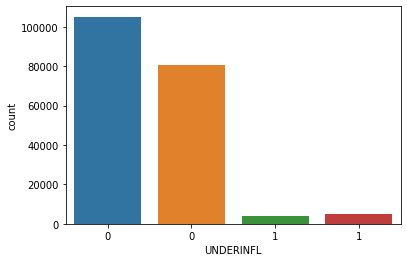

In [63]:
sns.countplot(x='UNDERINFL', data =  final_df)

As we can see these two columns are equal

In [64]:
df['SEVERITYCODE'].equals(df['SEVERITYCODE.1'])

True

Now we drop all the unnecessary columns which we are not going to use

In [65]:
df1 = df.drop(columns = ['LIGHTCOND','LOCATION','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC',
                         'SEVERITYDESC',
                         'SDOTCOLNUM','ST_COLCODE'
                        ,'ST_COLDESC','EXCEPTRSNCODE','EXCEPTRSNDESC','STATUS','CROSSWALKKEY',
                         'COLLISIONTYPE','COLDETKEY','REPORTNO','INATTENTIONIND','SEVERITYCODE.1'])


Now our dataset look like 

In [66]:
df1.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,ADDRTYPE,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,Intersection,37475.0,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,NaN,NaN,0,N
1,1,-122.347294,47.647172,2,52200,Block,NaN,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,NaN,NaN,0,N


Shape of our dataset

In [67]:
df1.shape

(194673, 19)

Now we are going to fill all the null values 

As we can see in the column 'ADDRTYPE'. We are going to replace all the null value with the most occurring one

In [68]:
df1['ADDRTYPE'].fillna(value =df1['ADDRTYPE'].value_counts().idxmax(),inplace  = True)

In [69]:
df1['JUNCTIONTYPE'].fillna(value =df1['JUNCTIONTYPE'].value_counts().idxmax(),inplace  = True)

In [70]:
df1['WEATHER'].fillna(value =df1['WEATHER'].value_counts().idxmax(),inplace  = True)

In [71]:
df1['ROADCOND'].fillna(value =df1['ROADCOND'].value_counts().idxmax(),inplace  = True)

Here we fill all the null values with 0

In [72]:
df1['UNDERINFL'].fillna(value = 0, inplace = True)

Here we just replace 'N' with 0 and 'Y' with '1'

In [73]:
df1['UNDERINFL'].replace({'N':0,'Y':1}, inplace = True)

As we know that columns like 'ROADCOND' is categorical with non-numerical values.So here we have to get numerical in place of alphabhatical ones

we can do that by various like label encoding but here i just replace the categorical value with some number like {'No' = 0 and 'Yes' = 1}

In [74]:
ADDRTYPE = pd.get_dummies(df1['ADDRTYPE'])

In [75]:
WEATHER = pd.get_dummies(df1['WEATHER'])

In [76]:
JUNCTIONTYPE = pd.get_dummies(df1['JUNCTIONTYPE'])

In [77]:
ROADCOND = pd.get_dummies(df1['ROADCOND'])

In [78]:
ROADCOND = pd.get_dummies(df1['ROADCOND'])

In [79]:
HITPARKEDCAR  = pd.get_dummies(df1['HITPARKEDCAR'])

Now concat all the dataframe we get

In [90]:
final_df = pd.concat([df1,ADDRTYPE,WEATHER,JUNCTIONTYPE,ROADCOND,HITPARKEDCAR], axis =1)

This is our final dataframe which we are going to use in our Machine learning models

In [91]:
final_df.head(1)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,ADDRTYPE,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,N,Y
0,2,-122.323148,47.70314,1,1307,Intersection,37475.0,2,0,0,...,0,0,0,0,0,0,0,1,1,0


Shape of our final dataset

In [92]:
final_df.shape

(194673, 51)

All the columns of our dataset

In [93]:
final_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'ADDRTYPE', 'INTKEY',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'SEGLANEKEY', 'HITPARKEDCAR', 'Alley', 'Block', 'Intersection',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Unknown',
       'Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown', 'Wet', 'N', 'Y'],
      dtype='object')

Again dropping some columns because we are not going to use those

In [94]:
final_df = final_df.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'INTKEY','SEGLANEKEY','Unknown','Unknown','Other','Unknown','N','Y'])

Now our dataset become like this

In [95]:
final_df.shape

(194673, 38)

Select the features of Machine learning algorithms

In [86]:
X = final_df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','Alley', 'Block', 'Intersection',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Dry',
       'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet']]
y = final_df['SEVERITYCODE']

Split the dataset in train set to train the model and test set to test the model

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Import all the matrices for checking the accuracy of the model

In [39]:
from sklearn.metrics import accuracy_score, f1_score

Import LogisticRegression and make instance of it and then train the model 

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr = LogisticRegression()

In [120]:
lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Test the trained model

In [121]:
prediction =  lr.predict(X_test)


we get aroung 75% accuracy for the trained logistic classifier

In [122]:
accuracy_score(y_test,prediction.round())

0.7558333203617514

In [123]:
f1_score(y_test, prediction.round())

0.8496587946633952

Import DecisionTreeClassifier and make instance of it then train the model

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree =  DecisionTreeClassifier()

In [114]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Test the train model

In [115]:
prediction = tree.predict(X_test)

We get around same result as of LinearRegression

In [116]:
accuracy_score(y_test,prediction)

0.7574521737776878

In [117]:
f1_score(y_test,prediction)

0.8494580024346415